<a href="https://colab.research.google.com/github/ChhaviC/comp3132/blob/main/LabWeek10_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 ## Lab - Week 10 - Dropout

### Ways to reduce overfitting in neural networks - all come at a cost
 - Getting more training data
 - Reducing the capacity of the network (last week's lab)
 - Adding weight regularization (last week's lab)
 - Adding dropout (the subject for this week)

### Typical training and validation loss over time
![](https://miro.medium.com/v2/resize:fit:720/format:webp/1*0VWDpLIRcMTssDf-zyOR4w.jpeg)

## Using dropout to reduce overfitting

Dropout is one of the most effective and most commonly used regularization techniques for neural networks, developed by Hinton and his
students at the University of Toronto. Dropout, applied to a layer, consists of randomly "dropping out" (i.e. setting to zero) a number of
output features of the layer during training. Let's say a given layer would normally have returned a vector `[0.2, 0.5, 1.3, 0.8, 1.1]` for a
given input sample during training; after applying dropout, this vector will have a few zero entries distributed at random, e.g. `[0, 0.5,
1.3, 0, 1.1]`. The "dropout rate" is the fraction of the features that are being zeroed-out; it is usually set between 0.2 and 0.5. At test
time, no units are dropped out, and instead the layer's output values are scaled down by a factor equal to the dropout rate, so as to
balance for the fact that more units are active than at training time.

![dropout](https://cdn-images-1.medium.com/max/1600/1*iWQzxhVlvadk6VAJjsgXgg.png)

In Keras you can introduce dropout in a network via the `Dropout` layer, which gets applied to the output of layer right before it, e.g.:
```python
model.add(layers.Dropout(0.5))
```

In [ ]:
import keras
keras.__version__

'3.8.0'

### Part 1: Load and Prepare Data - IMDB dataset (same as last week)

In [ ]:
from keras import models
from keras import layers
from keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
      for j in sequence:
        results[i, j] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


**As a routine, perform a sanity check on the dataset to understand the shape of the train and test inputs and outputs, and print out a sample of the data.**

In [ ]:
# Perform a sanity check
print("Shape of x_train:", x_train.shape)  # Should be (25000, 10000)
print("Shape of x_test:", x_test.shape)    # Should be (25000, 10000)
print("Shape of y_train:", y_train.shape)  # Should be (25000,)
print("Shape of y_test:", y_test.shape)    # Should be (25000,)

# Print a sample of the data
print("\nSample input (vectorized):", x_train[0][:20])  # Print first 20 values of first sample
print("Corresponding label:", y_train[0])  # Print the label for the first sample


Shape of x_train: (25000, 10000)
Shape of x_test: (25000, 10000)
Shape of y_train: (25000,)
Shape of y_test: (25000,)

Sample input (vectorized): [0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.]
Corresponding label: 1.0


### Part 2: Build a Simple Neural Network Model
Objective: Create a basic neural network model using Keras.

**Questions**
- What type of classification problem are we solving?
- How many neurons should there be in the output layer?
- What should be the activation function of the output layer?
- What loss function should be used?
- What activation function should be used on the hidden layers?


Build a sequential model with ne dense layer with 8 units and train it for 20 epochs.

Complete the code below:

In [ ]:
# TODO fix this code
  # Add a single hidden layer with 8 units and proper activation
  # Compile the model with an appropriate optimizer, loss function, and evaluation metric.
  # Show the summary of the model

from keras import models, layers, optimizers, losses, metrics

# Define the model
model = models.Sequential()
# Add a single hidden layer with 8 units and ReLU activation
model.add(layers.Dense(8, activation='relu', input_shape=(10000,)))
# Output layer with 1 neuron for binary classification and sigmoid activation
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model with appropriate settings
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Since it's a binary classification problem
              metrics=['accuracy'])

# Show the summary of the model
model.summary()






Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 8)                   │          80,008 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 80,017 (312.57 KB)

 Trainable params: 80,017 (312.57 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model for 20 epochs with batch size 512
hist_a = model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test, y_test))

# Evaluate the model
evaluation_results = model.evaluate(x_test, y_test)
print("Test accuracy:", evaluation_results[1])


Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step - accuracy: 0.7164 - loss: 0.5980 - val_accuracy: 0.8633 - val_loss: 0.3903
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.8941 - loss: 0.3273 - val_accuracy: 0.8820 - val_loss: 0.3193
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9216 - loss: 0.2469 - val_accuracy: 0.8866 - val_loss: 0.2949
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.9341 - loss: 0.2093 - val_accuracy: 0.8876 - val_loss: 0.2862
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 0.9430 - loss: 0.1841 - val_accuracy: 0.8861 - val_loss: 0.2860
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9521 - loss: 0.1616 - val_accuracy: 0.8864 - val_loss: 0.2870
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9566 - loss: 0.1464 - val_accuracy: 0.8840 - val_loss: 0.2927
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.9601 - loss: 0.1330 - val_accuracy: 0.8801 - v

### Part 3: Visualize Training and Validation Performance

The function below can be used later to plot the loss and accuracy from the model training history

In [ ]:
import matplotlib.pyplot as plt

# Colors will be used to plot different models below
colors = ['blue', 'red', 'green', 'purple', 'orange', 'brown', 'pink', 'gray', 'olive', 'cyan']

def plot_history(history, color='blue', prefix=""):
    history_dict = history.history
    loss_values = history_dict["loss"]
    val_loss_values = history_dict["val_loss"]
    accuracy_values = history_dict["accuracy"]  # Corrected key
    val_accuracy_values = history_dict["val_accuracy"]  # Corrected key
    epochs = range(1, len(loss_values) + 1)

    # Create figure
    plt.figure(figsize=(12, 5))

    # Plot the loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss_values, "o", color=color, label=prefix + " Training loss")
    plt.plot(epochs, val_loss_values, color=color, linestyle="dashed", label=prefix + " Validation loss")
    plt.title("Training and Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend(framealpha=0.5)
    plt.grid()

    # Plot the accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, val_accuracy_values, color=color, linestyle="dashed", label=prefix + " Validation Accuracy")
    plt.title("Training and Validation Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend(framealpha=0.5)
    plt.grid()

    plt.show()


<Figure size 1200x600 with 0 Axes>

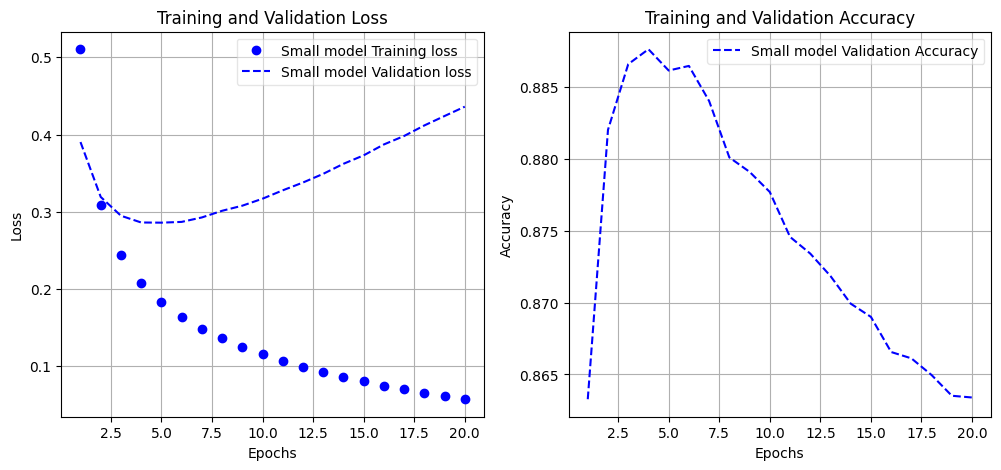

In [ ]:
# Using the plotting function
plt.figure(figsize=(12, 6))
plot_history(hist_a, color='blue', prefix="Small model")

### Part 4: Add Dropout Regularization
Objective: Experiment with dropout layers in the model.

**Instructions:**
1. Add another hidden layer with 8 units
1. Add dropout layers after each hidden layer with a dropout rate of 0.3.
1. Compile the model.
1. Train the model and observe the changes in accuracy.

Complete the code below:

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 9s 160ms/step - accuracy: 0.5998 - loss: 0.6612 - val_accuracy: 0.8536 - val_loss: 0.4984
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.7914 - loss: 0.4877 - val_accuracy: 0.8808 - val_loss: 0.3642
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.8497 - loss: 0.3746 - val_accuracy: 0.8858 - val_loss: 0.3068
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.8888 - loss: 0.3117 - val_accuracy: 0.8874 - val_loss: 0.2819
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - accuracy: 0.9087 - loss: 0.2644 - val_accuracy: 0.8885 - val_loss: 0.2763
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.9260 - loss: 0.2212 - val_accuracy: 0.8852 - val_loss: 0.2785
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9320 - loss: 0.2022 - val_accuracy: 0.8849 - val_loss: 0.2923
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9424 - loss: 0.1771 - val_accuracy: 0.8849 - 

<Figure size 1200x600 with 0 Axes>

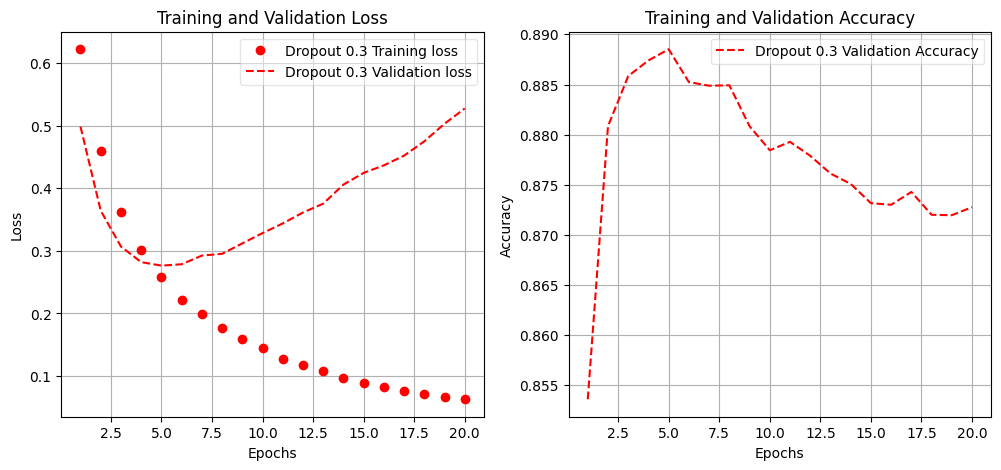

In [ ]:
from keras import models, layers, optimizers

# Build the model with dropout
drp_model = models.Sequential()

# Input layer + First hidden layer with 8 units and ReLU activation
drp_model.add(layers.Dense(8, activation='relu', input_shape=(10000,)))

# Dropout layer with 30% dropout rate
drp_model.add(layers.Dropout(0.3))

# Second hidden layer with 8 units and ReLU activation
drp_model.add(layers.Dense(8, activation='relu'))

# Dropout layer with 30% dropout rate
drp_model.add(layers.Dropout(0.3))

# Output layer with 1 neuron (since it's a binary classification task)
drp_model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
drp_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
drp_history = drp_model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test, y_test))

# Plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plot_history(drp_history, color='red', prefix="Dropout 0.3")


### Part 5: Test Different Dropout Rates
Objective: Compare the model's performance with varying dropout rates.

**Instructions:**
1. Write a loop to create and train models with dropout rates of `[0, 0.2, 0.3, 0.4, 0.5]`.
2. For each model, record the history to plot it later


Complete the code below:

In [ ]:
from keras import models, layers, optimizers
import matplotlib.pyplot as plt

# Different dropout rates to test
rates = [0, 0.2, 0.3, 0.4, 0.5]
hists = []

for rate in rates:
    print(f"Training model with dropout rate: {rate}")

    # Build model
    model = models.Sequential()
    model.add(layers.Dense(8, activation='relu', input_shape=(10000,)))

    # Apply dropout if rate > 0
    if rate > 0:
        model.add(layers.Dropout(rate))

    model.add(layers.Dense(8, activation='relu'))

    if rate > 0:
        model.add(layers.Dropout(rate))

    model.add(layers.Dense(1, activation='sigmoid'))  # Output layer

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    hist = model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test, y_test))

    # Store the training history
    hists.append(hist)

# Plot training history for all models
plt.figure(figsize=(12, 6))
colors = ['blue', 'red', 'green', 'purple', 'orange']

for i, hist in enumerate(hists):
    plot_history(hist, colors[i], prefix=f"Dropout {rates[i]}")



Training model with dropout rate: 0
Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 93ms/step - accuracy: 0.6986 - loss: 0.6161 - val_accuracy: 0.8655 - val_loss: 0.3876
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.8962 - loss: 0.3172 - val_accuracy: 0.8860 - val_loss: 0.2957
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.9266 - loss: 0.2141 - val_accuracy: 0.8856 - val_loss: 0.2893
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.9427 - loss: 0.1684 - val_accuracy: 0.8834 - val_loss: 0.2923
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9560 - loss: 0.1373 - val_accuracy: 0.8807 - val_loss: 0.3088
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9628 - loss: 0.1174 - val_accuracy: 0.8765 - val_loss: 0.3321
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9719 - loss: 0.0968 - val_accuracy: 0.8728 - val_loss: 0.3554
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.9773 - los

### Part 6: Experiment with dropout location
Objective: Compare the model's performance with dropout placed after different layers

**Instructions:**
Create 3 models with a single dropout "layer" placed:
1. Before the first dense layer only
2. After the first dense layer only
3. After the second dense layer only



Complete the code below:

In [ ]:
from keras import models, layers, optimizers
import matplotlib.pyplot as plt

hists_b = []  # Store training histories
rate = 0.4  # Dropout rate

# 1. Dropout before the first dense layer
model1 = models.Sequential()
model1.add(layers.Dropout(rate, input_shape=(10000,)))  # Dropout first
model1.add(layers.Dense(8, activation='relu'))
model1.add(layers.Dense(8, activation='relu'))
model1.add(layers.Dense(1, activation='sigmoid'))

model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
hist1 = model1.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test, y_test))
hists_b.append(hist1)

# 2. Dropout after the first dense layer
model2 = models.Sequential()
model2.add(layers.Dense(8, activation='relu', input_shape=(10000,)))
model2.add(layers.Dropout(rate))  # Dropout after first dense layer
model2.add(layers.Dense(8, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
hist2 = model2.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test, y_test))
hists_b.append(hist2)

# 3. Dropout after the second dense layer
model3 = models.Sequential()
model3.add(layers.Dense(8, activation='relu', input_shape=(10000,)))
model3.add(layers.Dense(8, activation='relu'))
model3.add(layers.Dropout(rate))  # Dropout after second dense layer
model3.add(layers.Dense(1, activation='sigmoid'))

model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
hist3 = model3.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test, y_test))
hists_b.append(hist3)

# Plot training history for all models
plt.figure(figsize=(12, 6))
prefixes = ['Dropout before 1st layer', 'Dropout after 1st layer', 'Dropout after 2nd layer']
colors = ['blue', 'red', 'green']

for i, hist in enumerate(hists_b):
    plot_history(hist, colors[i], prefix=prefixes[i])
